# Geração da Tabela 1 - Ajustada com funções Sklearn

# Treinamentos de Detecção de Anomalias para geração de matriz de confusão sem exclusão de extremos

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

tabelafinal = pd.DataFrame(columns=['algoritmo','contaminacao','acuracia','precisao','recall','fn','fp'])
print(tabelafinal)
novatabelafinal = pd.DataFrame(columns=['algoritmo','contaminacao','acuracia','precisao','recall','fn','fp'])
print(tabelafinal)
tabelafinalrecall = pd.DataFrame(columns=['algoritmo','contaminacao','acuracia','precisao','recall','fn','fp'])
print(tabelafinal)
   
def avalia(clf_name,Y,y_train_scores,y_train_pred):
    # Avalia e imprime os resultados
    tn, fp, fn, tp = confusion_matrix(Y,y_train_pred).ravel()
    ac=accuracy_score(Y,y_train_pred)*100
    print('Acurácia='+str(ac))   
    pc=precision_score(Y,y_train_pred)*100
    print('Precisão='+str(pc))
    rc=recall_score(Y,y_train_pred)*100
    print('Recall='+str(rc))
    print('Falso Negativo='+str(fn))
    print('Falso Positivo='+str(fp))

def gera_matriz_de_confusao(Y,y_train_pred,clf_name):
    cm = confusion_matrix(Y,y_train_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal','Anomalia'])
    disp.plot(cmap=plt.cm.Blues)
    disp.ax_.set(title='Matriz de Confusão do '+clf_name,xlabel='Valores preditos', ylabel='Valores reais')
    plt.show()
      
def calcula_anomalias(clf_name,parametros):
    menorfn=len(X)
    melhoracuracia=0
    mcont=0
    contamination=0.01
    while contamination<0.18:
        funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
        clf = eval(funcao)
        clf.fit(X)
        tn, fp, fn, tp = confusion_matrix(Y,clf.labels_).ravel()
        ac=accuracy_score(Y,clf.labels_)
        if fn<menorfn:
           mcont=contamination
           menorfn=fn
           melhoracuracia=ac
        else:
            if fn==menorfn:
                if ac>melhoracuracia:
                   mcont=contamination
                   menorfn=fn
                   melhoracuracia=ac                
        contamination=contamination+0.01
    contamination=mcont
    print("Avaliação do modelo "+clf_name+":")
    print('Contaminação utilizada='+str(contamination))
    return contamination

def calcula_anomalias_acuracia_fn(clf_name,parametros):
    menorfn=len(X)
    melhoracuracia=0
    mcont=0
    contamination=0.01
    while contamination<0.18:
        funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
        clf = eval(funcao)
        clf.fit(X)
        tn, fp, fn, tp = confusion_matrix(Y,clf.labels_).ravel()
        ac=accuracy_score(Y,clf.labels_)
        if ac>melhoracuracia:
           mcont=contamination
           menorfn=fn
           melhoracuracia=ac
        else:
            if ac==melhoracuracia:
                if fn<menorfn:
                   mcont=contamination
                   menorfn=fn
                   melhoracuracia=ac                
        contamination=contamination+0.01
    contamination=mcont
    print("Avaliação do modelo "+clf_name+" com Acurácia-fn:")
    print('Contaminação utilizada='+str(contamination))
    return contamination


def calcula_anomalias_recall_acuracia_fp(clf_name,parametros):
    melhorrc = 0
    menorfn=len(X)
    melhoracuracia=0
    mcont=0
    contamination=0.01
    while contamination<0.18:
        funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
        clf = eval(funcao)
        clf.fit(X)
        tn, fp, fn, tp = confusion_matrix(Y,clf.labels_).ravel()
        ac=accuracy_score(Y,clf.labels_)
        rc=recall_score(Y,clf.labels_)
        if rc>melhorrc:
           mcont=contamination
           menorfn=fn
           melhorrc=rc
           melhoracuracia=ac
        else:
            if rc==melhorrc:
                if ac>melhoracuracia:
                   mcont=contamination
                   menorfn=fn
                   melhorrc=rc
                   melhoracuracia=ac
                else:
                    if ac==melhoracuracia:
                        if fn<menorfn:
                           mcont=contamination
                           menorfn=fn
                           melhorrc=rc
                           melhoracuracia=ac               
        contamination=contamination+0.01
    contamination=mcont
    print("Avaliação do modelo "+clf_name+" com Recall-Acurácia-fn:")
    print('Contaminação utilizada='+str(contamination))
    return contamination

def grava_avaliacao(clf_name,Y,y_train_scores,y_train_pred,contamination):
    # Grava os resultados da avaliação na tabela final
    tn, fp, fn, tp = confusion_matrix(Y,y_train_pred).ravel()
    ac=accuracy_score(Y,y_train_pred)*100
    pc=precision_score(Y,y_train_pred)*100
    rc=recall_score(Y,y_train_pred)*100
    tabelafinal.loc[len(tabelafinal.index)] = [clf_name,contamination,ac,pc,rc,fn,fp] 
    
def grava_avaliacao_acuracia_fp(clf_name,Y,y_train_scores,y_train_pred,contamination):
    # Grava os resultados da avaliação na nova tabela final
    tn, fp, fn, tp = confusion_matrix(Y,y_train_pred).ravel()
    ac=accuracy_score(Y,y_train_pred)*100
    pc=precision_score(Y,y_train_pred)*100
    rc=recall_score(Y,y_train_pred)*100
    novatabelafinal.loc[len(tabelafinal.index)] = [clf_name,contamination,ac,pc,rc,fn,fp] 
    
def grava_avaliacao_recall_acuracia_fp(clf_name,Y,y_train_scores,y_train_pred,contamination):
    # Grava os resultados da avaliação na nova tabela final
    tn, fp, fn, tp = confusion_matrix(Y,y_train_pred).ravel()
    ac=accuracy_score(Y,y_train_pred)*100
    pc=precision_score(Y,y_train_pred)*100
    rc=recall_score(Y,y_train_pred)*100
    tabelafinalrecall.loc[len(tabelafinal.index)] = [clf_name,contamination,ac,pc,rc,fn,fp] 

Empty DataFrame
Columns: [algoritmo, contaminacao, acuracia, precisao, recall, fn, fp]
Index: []
Empty DataFrame
Columns: [algoritmo, contaminacao, acuracia, precisao, recall, fn, fp]
Index: []
Empty DataFrame
Columns: [algoritmo, contaminacao, acuracia, precisao, recall, fn, fp]
Index: []


# Carrega dados de arquivo CSV  
Separando catmat_id= 445485 -> Descrição:'ÁGUA MINERAL NATURAL, TIPO SEM GÁS MATERIAL EMBALAGEM PLÁSTICO TIPO EMBALAGEM 
RETORNÁVEL', Grupo: '89', SUBSISTÊNCIA Classe: '8960', BEBIDAS NÃO ALCOÓLICAS PDM: '19555', ÁGUA MINERAL NATURAL

In [2]:
def load_itens(path):
    csv_path = os.path.join(path,"aguatabela2.csv")
    return pd.read_csv(csv_path)

df=load_itens(".")
df = df.drop(['data'],axis=1)
print(df)
dfajustado=df

     quantidade  valor_unitario  anomalia
0           420           12.00         0
1         28000            5.88         1
2           360            7.70         0
3           120            7.70         0
4          2985            4.20         0
..          ...             ...       ...
389        1440           11.37         0
390        4608            0.62         1
391        1440           10.58         0
392        4608            0.54         1
393          10           20.00         1

[394 rows x 3 columns]


In [3]:
#Syntax: class sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)

#Parameters:
#copy: If False, inplace scaling is done. If True , copy is created instead of inplace scaling.
#with_mean: If True, data is centered before scaling.
#with_std: If True, data is scaled to unit variance.

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#model = scaler.fit(data)
#scaled_data = model.transform(data)
 

In [4]:
#Syntax: class sklearn.preprocessing.MinMaxScaler(feature_range=0, 1, *, copy=True, clip=False)

#Parameters:

#feature_range: Desired range of scaled data. The default range for the feature returned by MinMaxScaler is  0 to 1. The range is provided in tuple form as (min,max).
#copy: If False, inplace scaling is done. If True , copy is created instead of inplace scaling.
#clip: If True, scaled data is clipped to provided feature range.

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#model=scaler.fit(data)
#scaled_data=model.transform(data)

In [5]:
#class sklearn.preprocessing.LabelEncoder[source]¶
#Encode target labels with value between 0 and n_classes-1.
#This transformer should be used to encode target values, i.e. y, and not the input X.
#It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.
#>>>
#>>> le = preprocessing.LabelEncoder()
#>>> le.fit(["paris", "paris", "tokyo", "amsterdam"])
#LabelEncoder()
#>>> list(le.classes_)
#['amsterdam', 'paris', 'tokyo']
#>>> le.transform(["tokyo", "tokyo", "paris"])
#array([2, 2, 1]...)
#>>> list(le.inverse_transform([2, 2, 1]))
#['tokyo', 'tokyo', 'paris']
#Methods
#fit(y)
#Fit label encoder.
#fit_transform(y)
#Fit label encoder and return encoded labels.
#get_params([deep])
#Get parameters for this estimator.
#inverse_transform(y)
#Transform labels back to original encoding.
#set_output(*[, transform])
#Set output container.
#set_params(**params)
#Set the parameters of this estimator.
#transform(y)
#Transform labels to normalized encoding.

# Separação do Label dos dados

In [6]:

X = dfajustado.iloc[:, :-1]
Y = dfajustado.iloc[:, -1]
print(X)
print(Y)
# X = dfajustado esta linha estava gerando valores errados, já que incluia o campo anomalia no treinamento

     quantidade  valor_unitario
0           420           12.00
1         28000            5.88
2           360            7.70
3           120            7.70
4          2985            4.20
..          ...             ...
389        1440           11.37
390        4608            0.62
391        1440           10.58
392        4608            0.54
393          10           20.00

[394 rows x 2 columns]
0      0
1      1
2      0
3      0
4      0
      ..
389    0
390    1
391    0
392    1
393    1
Name: anomalia, Length: 394, dtype: int64


Avaliação do modelo PCA:
Contaminação utilizada=0.17
Acurácia=81.97969543147208
Precisão=46.26865671641791
Recall=46.96969696969697
Falso Negativo=35
Falso Positivo=36



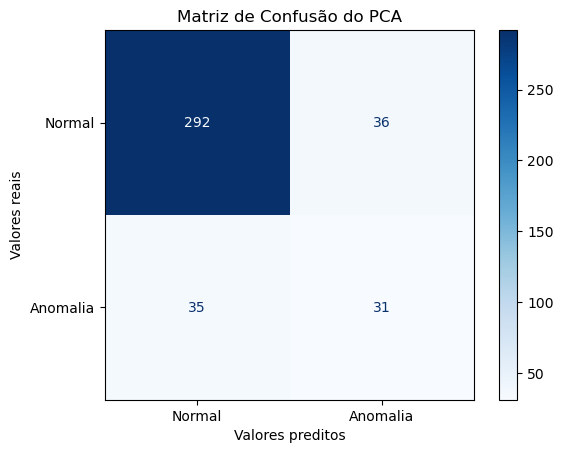

Avaliação do modelo PCA com Acurácia-fn:
Contaminação utilizada=0.03
Acurácia=85.78680203045685
Precisão=91.66666666666666
Recall=16.666666666666664
Falso Negativo=55
Falso Positivo=1



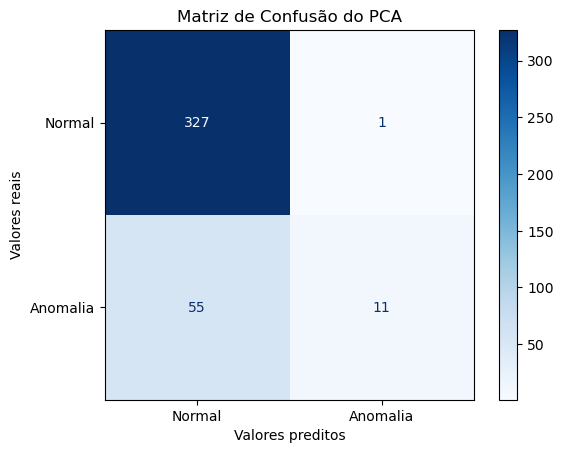

Avaliação do modelo PCA com Recall-Acurácia-fn:
Contaminação utilizada=0.17
Acurácia=81.97969543147208
Precisão=46.26865671641791
Recall=46.96969696969697
Falso Negativo=35
Falso Positivo=36



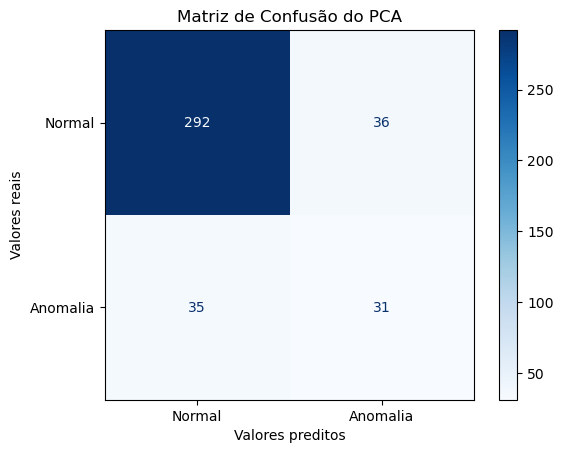

In [7]:
from pyod.models.pca import PCA
# Treinar algoritmo PCA para encontrar melhor contaminação
clf_name = 'PCA'
parametros='n_components=2,n_selected_components=2,'

#################################################################
# Calcula melhor contaminação primeiro com falso negativo depois acurárica
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com acurácia depois com falso negativo 
contamination=calcula_anomalias_acuracia_fn(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso negativo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo OCSVM:
Contaminação utilizada=0.17
Acurácia=69.79695431472082
Precisão=10.44776119402985
Recall=10.606060606060606
Falso Negativo=59
Falso Positivo=60



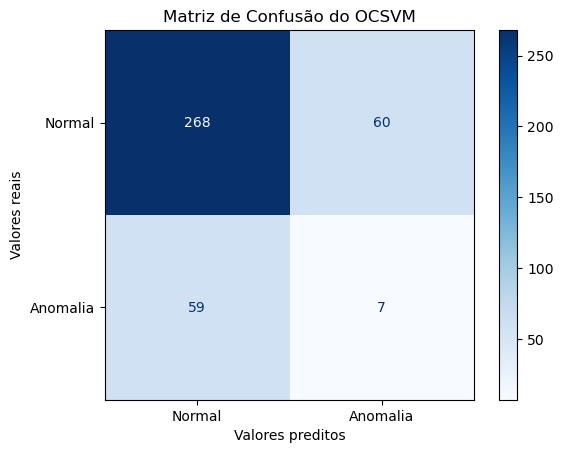

Avaliação do modelo OCSVM com Acurácia-fn:
Contaminação utilizada=0.01
Acurácia=82.23350253807106
Precisão=0.0
Recall=0.0
Falso Negativo=66
Falso Positivo=4



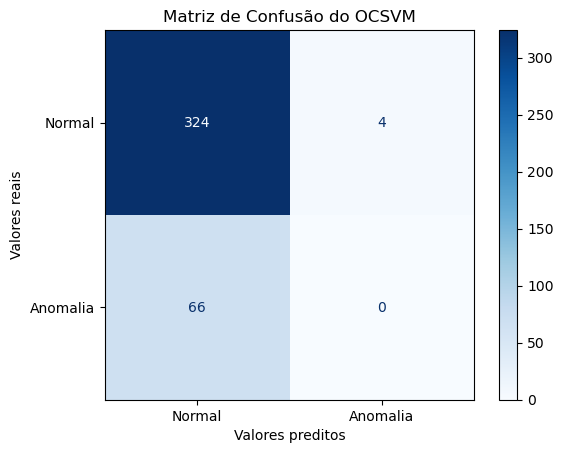

Avaliação do modelo OCSVM com Recall-Acurácia-fn:
Contaminação utilizada=0.17
Acurácia=69.79695431472082
Precisão=10.44776119402985
Recall=10.606060606060606
Falso Negativo=59
Falso Positivo=60



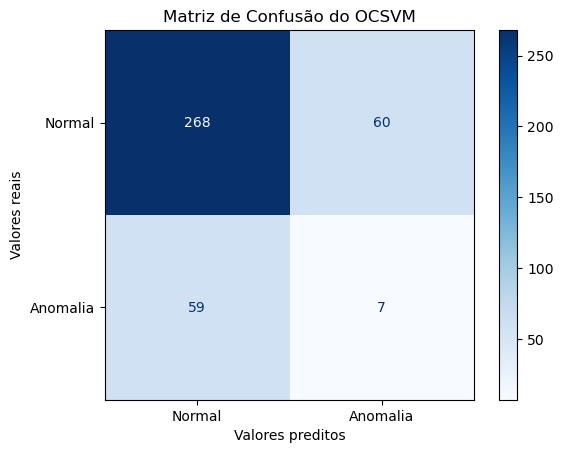

In [8]:
from pyod.models.ocsvm import OCSVM
# train OCSVM detector
clf_name = 'OCSVM'
parametros=''
contamination=calcula_anomalias(clf_name,'')

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fn(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

53
Avaliação do modelo LOF:
Contaminação utilizada=0.17
Acurácia=80.45685279187818
Precisão=41.7910447761194
Recall=42.42424242424242
Falso Negativo=38
Falso Positivo=39



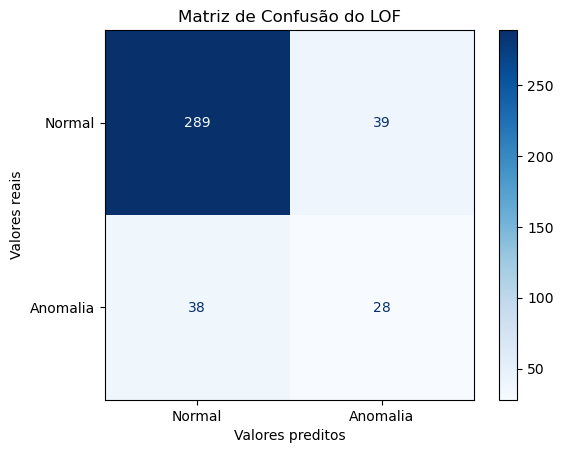

Avaliação do modelo LOF com Acurácia-fn:
Contaminação utilizada=0.03
Acurácia=86.29441624365482
Precisão=100.0
Recall=18.181818181818183
Falso Negativo=54
Falso Positivo=0



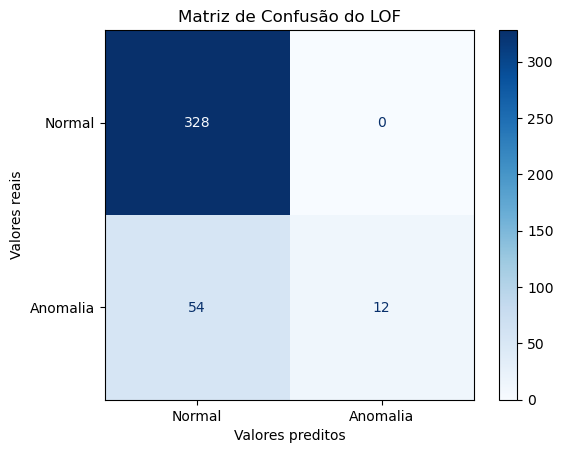

Avaliação do modelo LOF com Recall-Acurácia-fn:
Contaminação utilizada=0.17
Acurácia=80.45685279187818
Precisão=41.7910447761194
Recall=42.42424242424242
Falso Negativo=38
Falso Positivo=39



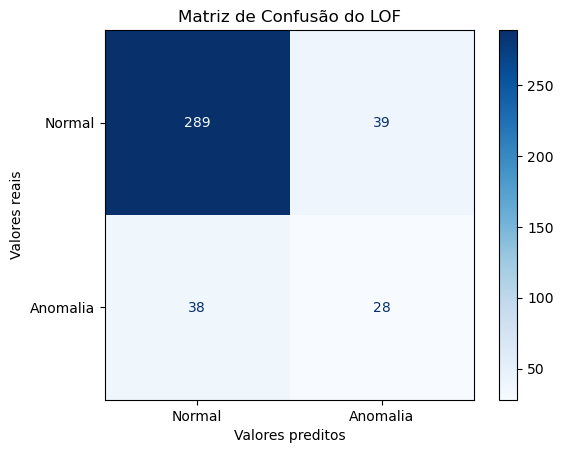

In [9]:
from pyod.models.lof import LOF
# train LOF detector
clf_name = 'LOF'
itens = len(X)/2
vizinhos=2
macuracia=0
nv=2
while vizinhos<itens: 
    clf = LOF(n_neighbors=vizinhos,contamination=contamination)
    clf.fit(X)
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)        
    ac=accuracy_score(Y,y_train_pred)
    if ac>macuracia:
        nv=vizinhos
        macuracia=ac
    vizinhos=vizinhos+1

print(nv)    

parametros='n_neighbors='+str(nv)+','
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fn(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo CBLOF:
Contaminação utilizada=0.17
Acurácia=73.85786802030458
Precisão=22.388059701492537
Recall=22.727272727272727
Falso Negativo=51
Falso Positivo=52



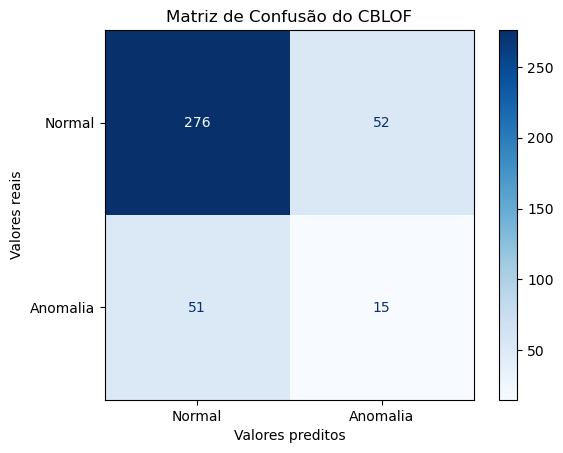

Avaliação do modelo CBLOF com Acurácia-fn:
Contaminação utilizada=0.03
Acurácia=85.78680203045685
Precisão=91.66666666666666
Recall=16.666666666666664
Falso Negativo=55
Falso Positivo=1



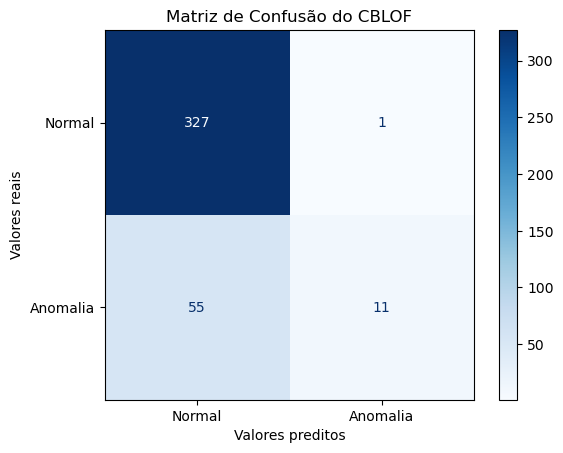

Avaliação do modelo CBLOF com Recall-Acurácia-fn:
Contaminação utilizada=0.09
Acurácia=81.21827411167513
Precisão=38.88888888888889
Recall=21.21212121212121
Falso Negativo=52
Falso Positivo=22



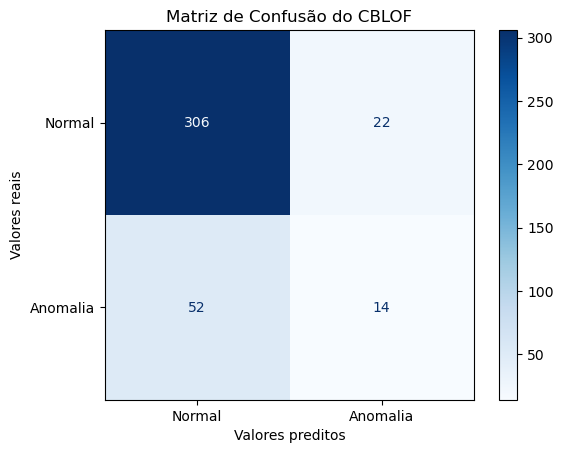

In [10]:
from pyod.models.cblof import CBLOF
# train CBLOF detector
clf_name = 'CBLOF' 
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fn(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo COF:
Contaminação utilizada=0.09999999999999999
Acurácia=79.18781725888326
Precisão=30.0
Recall=18.181818181818183
Falso Negativo=54
Falso Positivo=28



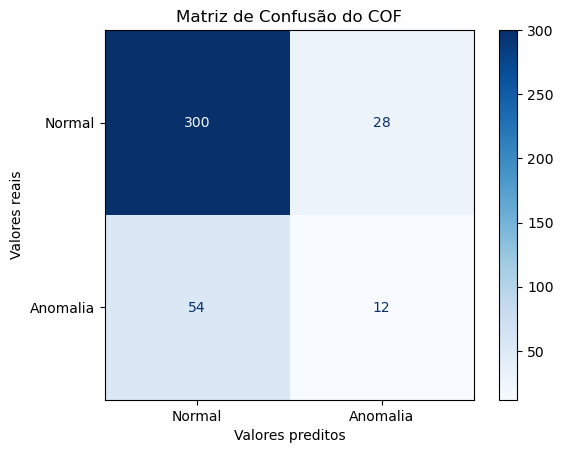

Avaliação do modelo COF com Acurácia-fn:
Contaminação utilizada=0.02
Acurácia=84.26395939086294
Precisão=75.0
Recall=9.090909090909092
Falso Negativo=60
Falso Positivo=2



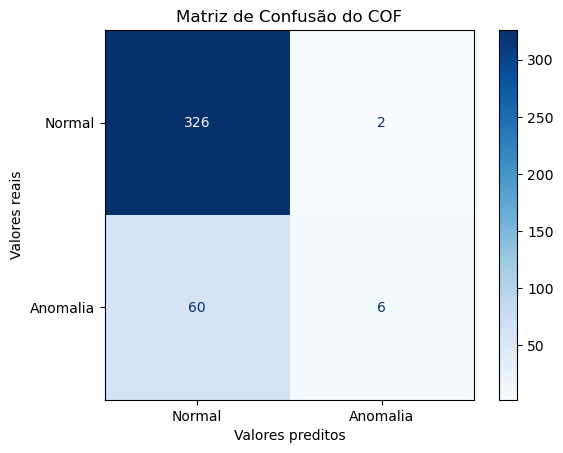

Avaliação do modelo COF com Recall-Acurácia-fn:
Contaminação utilizada=0.09999999999999999
Acurácia=79.18781725888326
Precisão=30.0
Recall=18.181818181818183
Falso Negativo=54
Falso Positivo=28



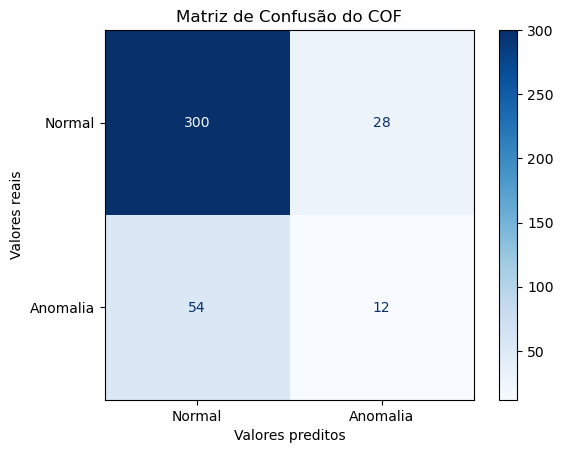

In [11]:
from pyod.models.cof import COF
# train COF detector
clf_name = 'COF' 
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fn(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo HBOS:
Contaminação utilizada=0.17
Acurácia=75.1269035532995
Precisão=25.757575757575758
Recall=25.757575757575758
Falso Negativo=49
Falso Positivo=49



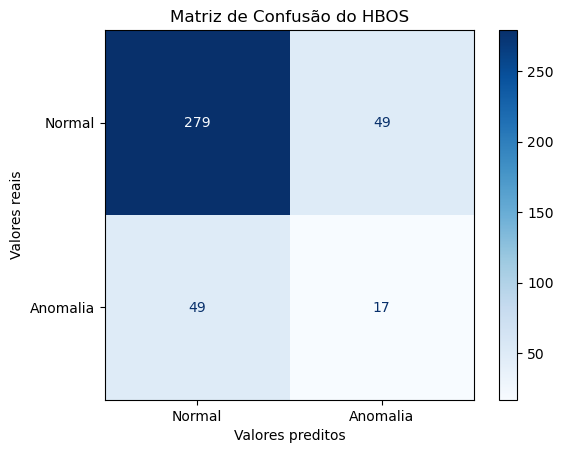

Avaliação do modelo HBOS com Acurácia-fn:
Contaminação utilizada=0.04
Acurácia=86.29441624365482
Precisão=92.85714285714286
Recall=19.696969696969695
Falso Negativo=53
Falso Positivo=1



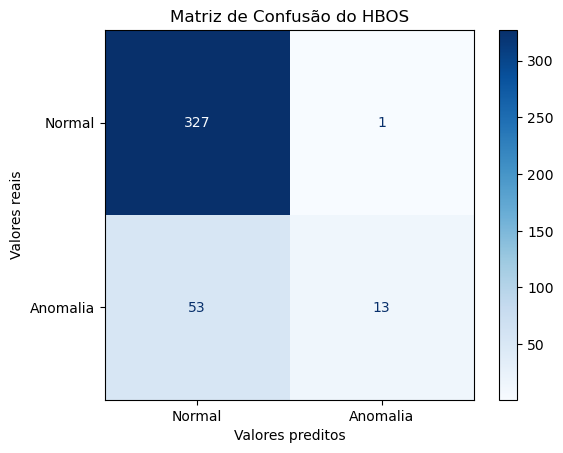

Avaliação do modelo HBOS com Recall-Acurácia-fn:
Contaminação utilizada=0.17
Acurácia=75.1269035532995
Precisão=25.757575757575758
Recall=25.757575757575758
Falso Negativo=49
Falso Positivo=49



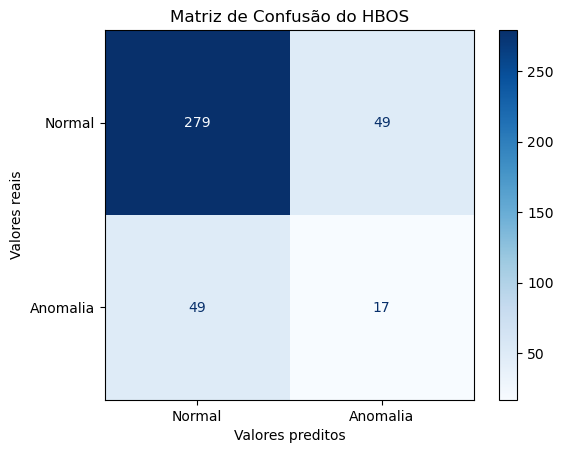

In [12]:
from pyod.models.hbos import HBOS

# train HBOS detector
clf_name = 'HBOS'
parametros='n_bins=35, alpha=contamination,'
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fn(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo KNN:
Contaminação utilizada=0.12999999999999998
Acurácia=78.68020304568529
Precisão=32.69230769230769
Recall=25.757575757575758
Falso Negativo=49
Falso Positivo=35



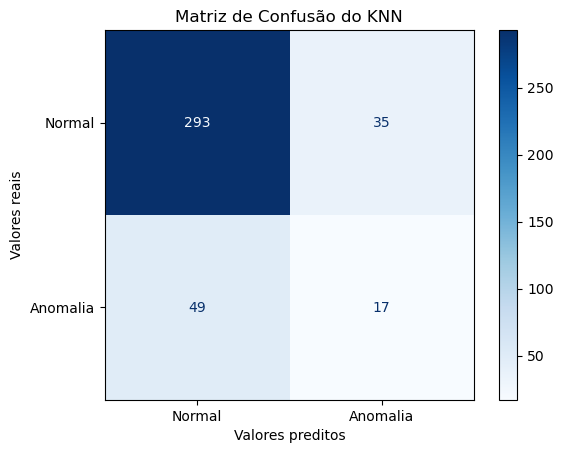

Avaliação do modelo KNN com Acurácia-fn:
Contaminação utilizada=0.03
Acurácia=85.78680203045685
Precisão=91.66666666666666
Recall=16.666666666666664
Falso Negativo=55
Falso Positivo=1



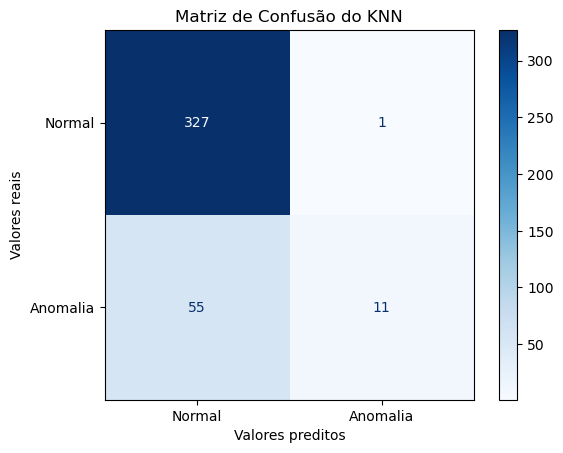

Avaliação do modelo KNN com Recall-Acurácia-fn:
Contaminação utilizada=0.12999999999999998
Acurácia=78.68020304568529
Precisão=32.69230769230769
Recall=25.757575757575758
Falso Negativo=49
Falso Positivo=35



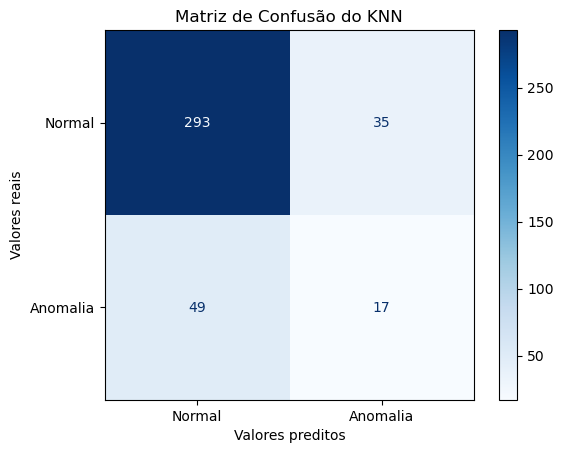

In [13]:
from pyod.models.knn import KNN
# train KNN detector
clf_name = 'KNN'
parametros='n_neighbors=35,'
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fn(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo SOD:
Contaminação utilizada=0.17
Acurácia=80.96446700507614
Precisão=43.28358208955223
Recall=43.93939393939394
Falso Negativo=37
Falso Positivo=38



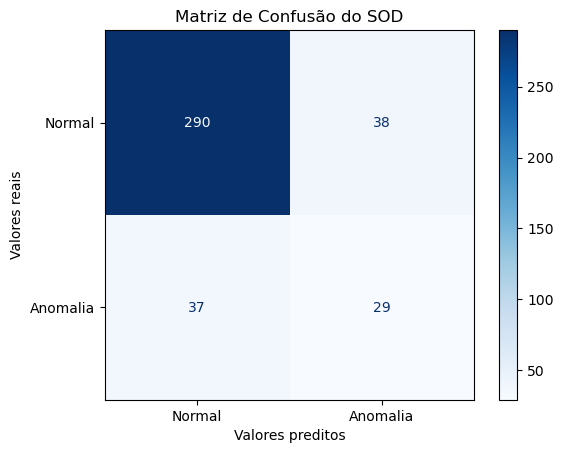

Avaliação do modelo SOD com Acurácia-fn:
Contaminação utilizada=0.03
Acurácia=85.27918781725889
Precisão=83.33333333333334
Recall=15.151515151515152
Falso Negativo=56
Falso Positivo=2



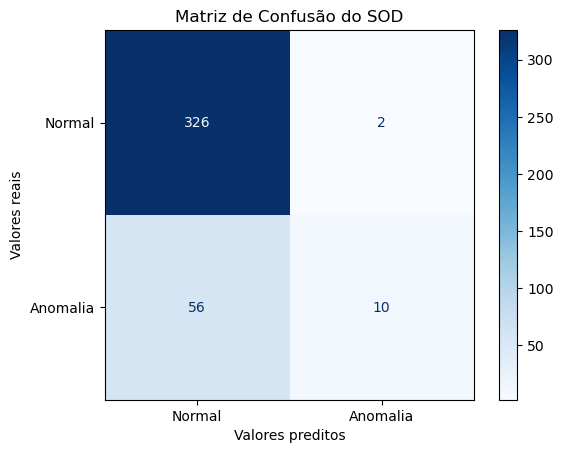

Avaliação do modelo SOD com Recall-Acurácia-fn:
Contaminação utilizada=0.17
Acurácia=80.96446700507614
Precisão=43.28358208955223
Recall=43.93939393939394
Falso Negativo=37
Falso Positivo=38



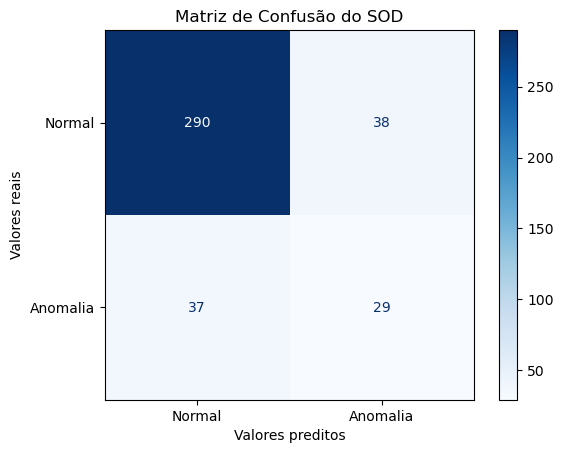

In [14]:
from pyod.models.sod import SOD
# train SOD detector
clf_name = 'SOD' 
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fn(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo COPOD:
Contaminação utilizada=0.16
Acurácia=85.53299492385787
Precisão=57.14285714285714
Recall=54.54545454545454
Falso Negativo=30
Falso Positivo=27



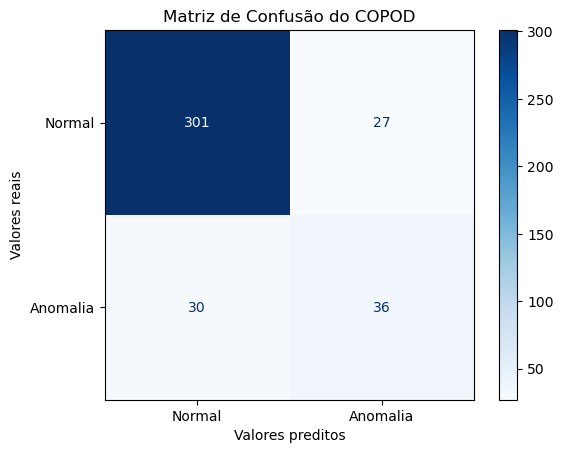

Avaliação do modelo COPOD com Acurácia-fn:
Contaminação utilizada=0.08
Acurácia=89.34010152284264
Precisão=87.5
Recall=42.42424242424242
Falso Negativo=38
Falso Positivo=4



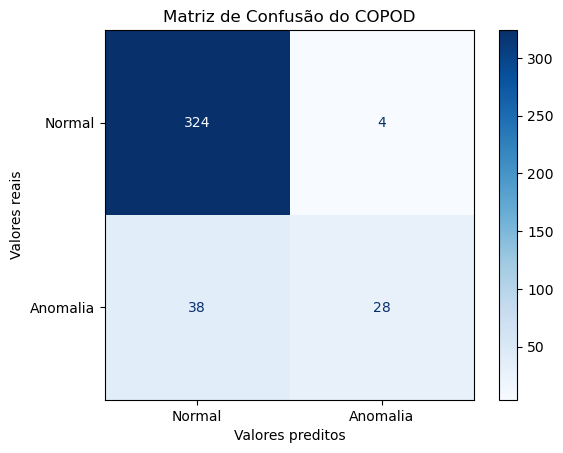

Avaliação do modelo COPOD com Recall-Acurácia-fn:
Contaminação utilizada=0.16
Acurácia=85.53299492385787
Precisão=57.14285714285714
Recall=54.54545454545454
Falso Negativo=30
Falso Positivo=27



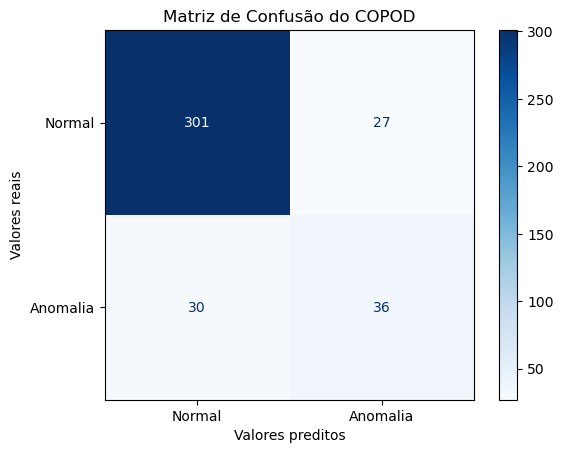

In [15]:
from pyod.models.copod import COPOD
# train COPOD detector
clf_name = 'COPOD'
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fn(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo ECOD:
Contaminação utilizada=0.17
Acurácia=88.07106598984772
Precisão=64.17910447761194
Recall=65.15151515151516
Falso Negativo=23
Falso Positivo=24



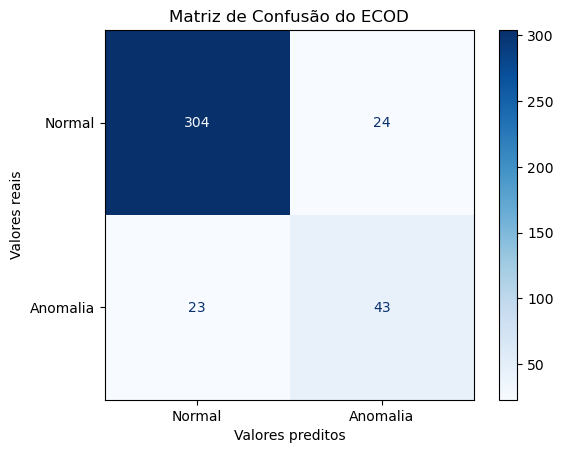

Avaliação do modelo ECOD com Acurácia-fn:
Contaminação utilizada=0.09999999999999999
Acurácia=92.38578680203045
Precisão=95.0
Recall=57.57575757575758
Falso Negativo=28
Falso Positivo=2



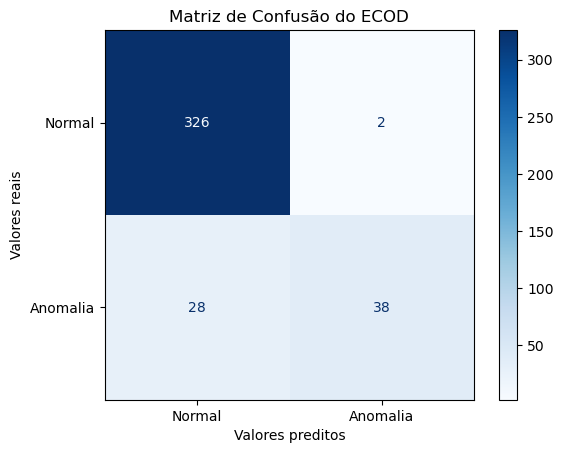

Avaliação do modelo ECOD com Recall-Acurácia-fn:
Contaminação utilizada=0.17
Acurácia=88.07106598984772
Precisão=64.17910447761194
Recall=65.15151515151516
Falso Negativo=23
Falso Positivo=24



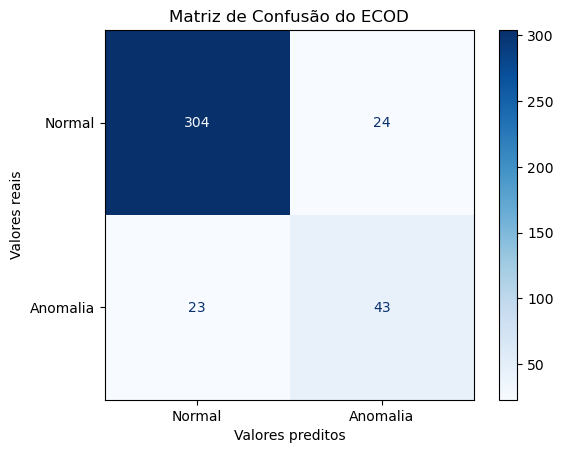

In [16]:
from pyod.models.ecod import ECOD
# train ECOD detector
clf_name = 'ECOD'
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fn(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo IForest:
Contaminação utilizada=0.15
Acurácia=83.50253807106598
Precisão=50.847457627118644
Recall=45.45454545454545
Falso Negativo=36
Falso Positivo=29



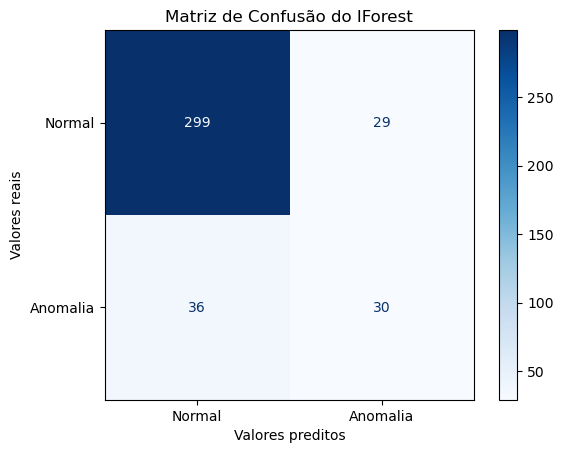

Avaliação do modelo IForest com Acurácia-fn:
Contaminação utilizada=0.03
Acurácia=86.29441624365482
Precisão=100.0
Recall=18.181818181818183
Falso Negativo=54
Falso Positivo=0



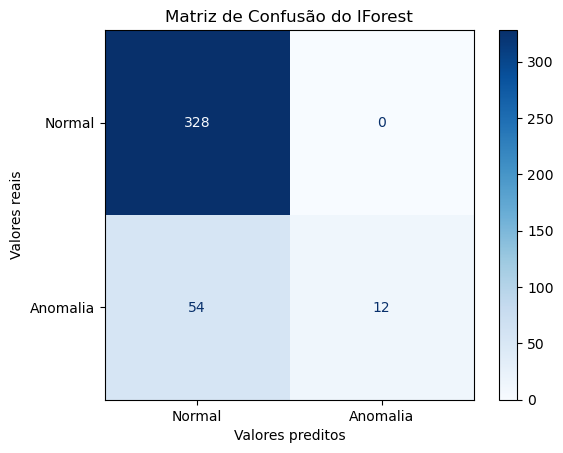

Avaliação do modelo IForest com Recall-Acurácia-fn:
Contaminação utilizada=0.16
Acurácia=82.48730964467005
Precisão=47.61904761904761
Recall=45.45454545454545
Falso Negativo=36
Falso Positivo=33



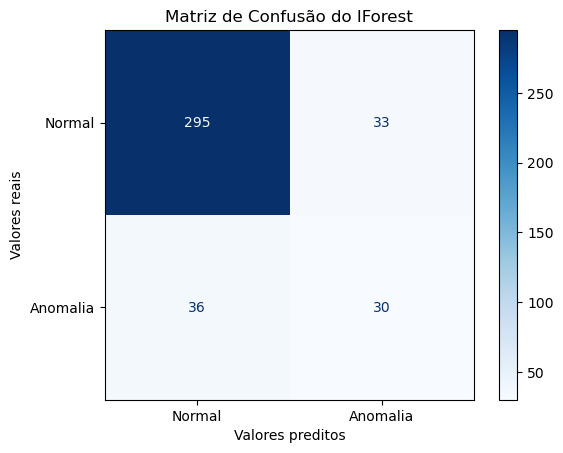

In [17]:
from pyod.models.iforest import IForest
# train IForest detector
clf_name = 'IForest'
itens = len(X)
estimadores = len(X)//10
if estimadores<2: estimadores=2

parametros='n_estimators=estimadores,'
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fn(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo LODA:
Contaminação utilizada=0.13999999999999999
Acurácia=77.15736040609137
Precisão=28.57142857142857
Recall=24.242424242424242
Falso Negativo=50
Falso Positivo=40



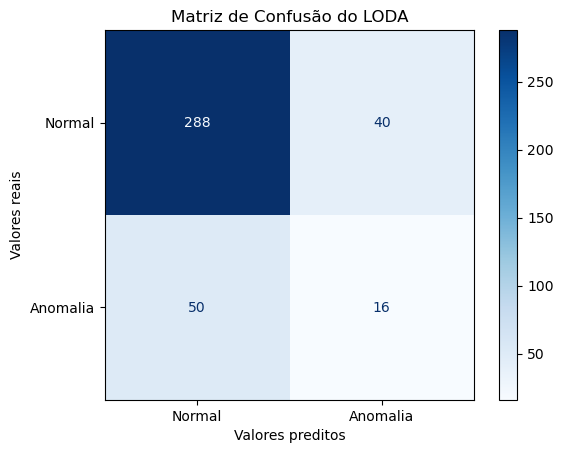

Avaliação do modelo LODA com Acurácia-fn:
Contaminação utilizada=0.03
Acurácia=86.29441624365482
Precisão=100.0
Recall=18.181818181818183
Falso Negativo=54
Falso Positivo=0



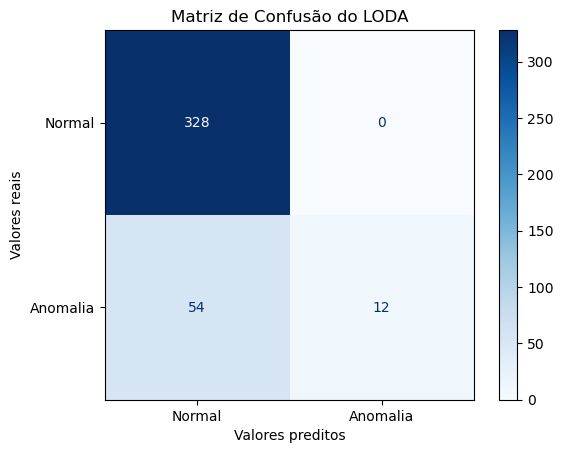

Avaliação do modelo LODA com Recall-Acurácia-fn:
Contaminação utilizada=0.13999999999999999
Acurácia=77.15736040609137
Precisão=28.57142857142857
Recall=24.242424242424242
Falso Negativo=50
Falso Positivo=40



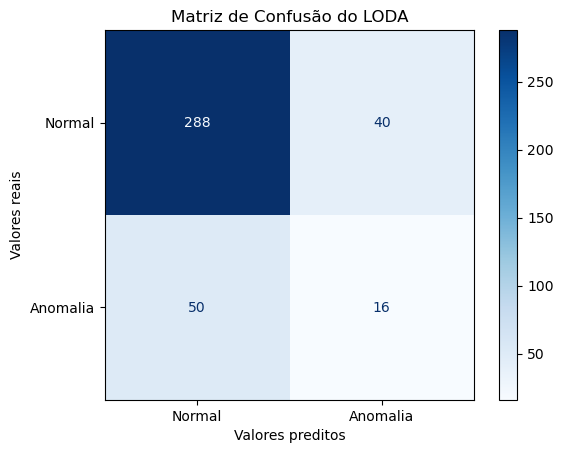

In [18]:
from pyod.models.loda import LODA
# train LODA detector
clf_name = 'LODA' 
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fn(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo DeepSVDD:
Contaminação utilizada=0.17
Acurácia=74.36548223350253
Precisão=23.88059701492537
Recall=24.242424242424242
Falso Negativo=50
Falso Positivo=51



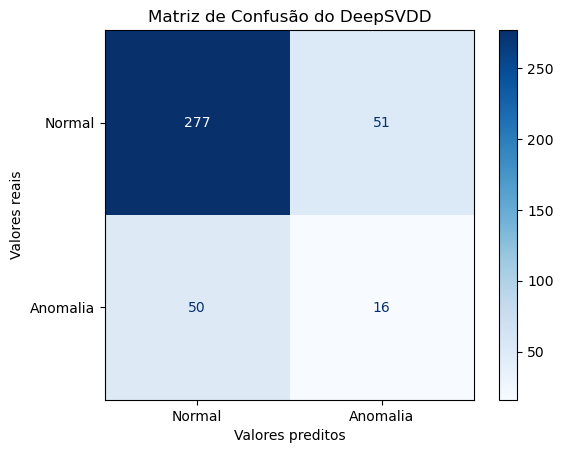

Avaliação do modelo DeepSVDD com Acurácia-fn:
Contaminação utilizada=0.03
Acurácia=84.77157360406092
Precisão=75.0
Recall=13.636363636363635
Falso Negativo=57
Falso Positivo=3



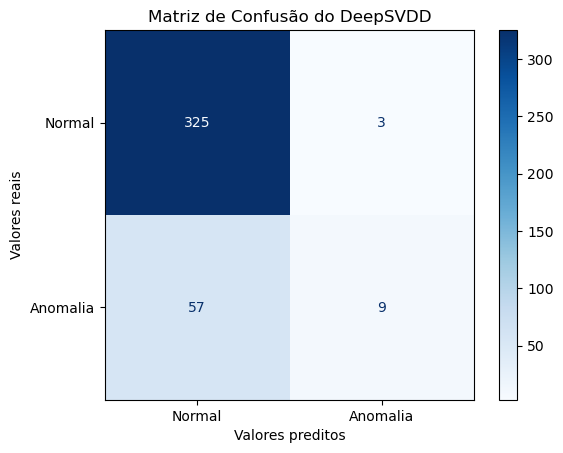

Avaliação do modelo DeepSVDD com Recall-Acurácia-fn:
Contaminação utilizada=0.12999999999999998
Acurácia=80.71065989847716
Precisão=40.38461538461539
Recall=31.818181818181817
Falso Negativo=45
Falso Positivo=31



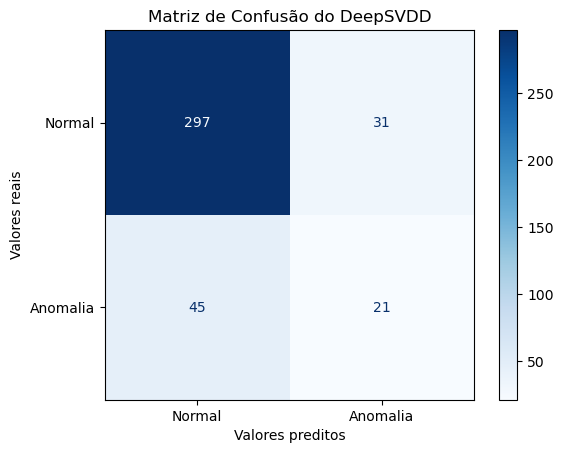

In [19]:
from pyod.models.deep_svdd import DeepSVDD
# train DeepSVDD detector
clf_name = 'DeepSVDD'
parametros='verbose=0,preprocessing=True,'
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fn(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo GMM:
Contaminação utilizada=0.17
Acurácia=78.42639593908629
Precisão=35.82089552238806
Recall=36.36363636363637
Falso Negativo=42
Falso Positivo=43



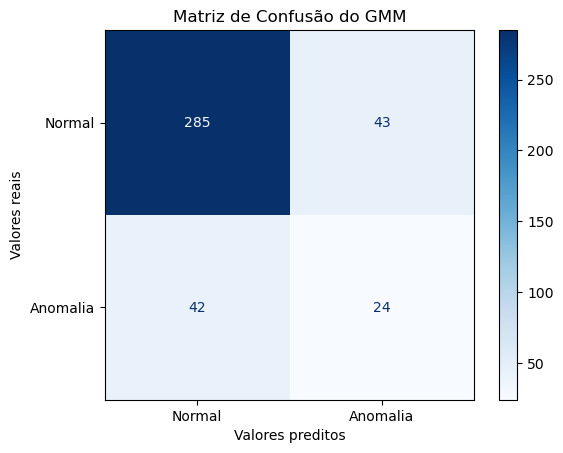

Avaliação do modelo GMM com Acurácia-fn:
Contaminação utilizada=0.03
Acurácia=85.78680203045685
Precisão=91.66666666666666
Recall=16.666666666666664
Falso Negativo=55
Falso Positivo=1



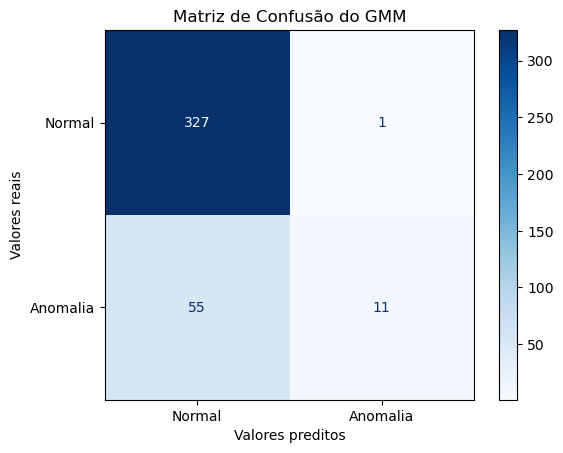

Avaliação do modelo GMM com Recall-Acurácia-fn:
Contaminação utilizada=0.17
Acurácia=78.42639593908629
Precisão=35.82089552238806
Recall=36.36363636363637
Falso Negativo=42
Falso Positivo=43



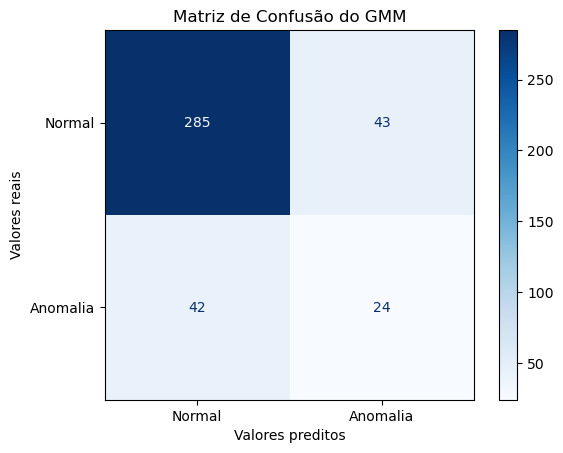

In [20]:
from pyod.models.gmm import GMM
# train GMM detector
clf_name = 'GMM' 
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fn(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

In [21]:
tabelafinal.sort_values("acuracia", axis = 0, ascending = False,
                 inplace = True, na_position ='last')
print(tabelafinal)

   algoritmo  contaminacao   acuracia   precisao     recall  fn  fp
9       ECOD          0.17  88.071066  64.179104  65.151515  23  24
8      COPOD          0.16  85.532995  57.142857  54.545455  30  27
10   IForest          0.15  83.502538  50.847458  45.454545  36  29
0        PCA          0.17  81.979695  46.268657  46.969697  35  36
7        SOD          0.17  80.964467  43.283582  43.939394  37  38
2        LOF          0.17  80.456853  41.791045  42.424242  38  39
4        COF          0.10  79.187817  30.000000  18.181818  54  28
6        KNN          0.13  78.680203  32.692308  25.757576  49  35
13       GMM          0.17  78.426396  35.820896  36.363636  42  43
11      LODA          0.14  77.157360  28.571429  24.242424  50  40
5       HBOS          0.17  75.126904  25.757576  25.757576  49  49
12  DeepSVDD          0.17  74.365482  23.880597  24.242424  50  51
3      CBLOF          0.17  73.857868  22.388060  22.727273  51  52
1      OCSVM          0.17  69.796954  10.447761

In [22]:
novatabelafinal.sort_values("acuracia", axis = 0, ascending = False,
                 inplace = True, na_position ='last')
print(novatabelafinal)

   algoritmo  contaminacao   acuracia    precisao     recall  fn  fp
10      ECOD          0.10  92.385787   95.000000  57.575758  28   2
9      COPOD          0.08  89.340102   87.500000  42.424242  38   4
3        LOF          0.03  86.294416  100.000000  18.181818  54   0
6       HBOS          0.04  86.294416   92.857143  19.696970  53   1
11   IForest          0.03  86.294416  100.000000  18.181818  54   0
12      LODA          0.03  86.294416  100.000000  18.181818  54   0
1        PCA          0.03  85.786802   91.666667  16.666667  55   1
4      CBLOF          0.03  85.786802   91.666667  16.666667  55   1
7        KNN          0.03  85.786802   91.666667  16.666667  55   1
14       GMM          0.03  85.786802   91.666667  16.666667  55   1
8        SOD          0.03  85.279188   83.333333  15.151515  56   2
13  DeepSVDD          0.03  84.771574   75.000000  13.636364  57   3
5        COF          0.02  84.263959   75.000000   9.090909  60   2
2      OCSVM          0.01  82.233

In [23]:
tabelafinalrecall.sort_values("acuracia", axis = 0, ascending = False,
                 inplace = True, na_position ='last')
print(tabelafinalrecall)

   algoritmo  contaminacao   acuracia   precisao     recall  fn  fp
10      ECOD          0.17  88.071066  64.179104  65.151515  23  24
9      COPOD          0.16  85.532995  57.142857  54.545455  30  27
11   IForest          0.16  82.487310  47.619048  45.454545  36  33
1        PCA          0.17  81.979695  46.268657  46.969697  35  36
4      CBLOF          0.09  81.218274  38.888889  21.212121  52  22
8        SOD          0.17  80.964467  43.283582  43.939394  37  38
13  DeepSVDD          0.13  80.710660  40.384615  31.818182  45  31
3        LOF          0.17  80.456853  41.791045  42.424242  38  39
5        COF          0.10  79.187817  30.000000  18.181818  54  28
7        KNN          0.13  78.680203  32.692308  25.757576  49  35
14       GMM          0.17  78.426396  35.820896  36.363636  42  43
12      LODA          0.14  77.157360  28.571429  24.242424  50  40
6       HBOS          0.17  75.126904  25.757576  25.757576  49  49
2      OCSVM          0.17  69.796954  10.447761